In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("vina.csv")
df

,indeks,drzava,opis,ime,poeni,cijena,provincija,region_1,region_2,ime_testera,twiter_testera,naziv,vrsta,vinarija
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129966,129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.0,Mosel,NaN,NaN,Anna Lee C. Iijima,NaN,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef)
129967,129967,US,Citation is given as much as a decade of bottl...,NaN,90,75.0,Oregon,Oregon,Oregon Other,Paul Gregutt,@paulgwine,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation
129968,129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser
129969,129969,France,"A dry style of Pinot Gris, this is crisp with ...",NaN,90,32.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss


In [3]:
import time

pocetak_obrade = time.time()

df = pd.read_csv("vina.csv")

kraj_obrade = time.time()

vrijeme_obrade = kraj_obrade - pocetak_obrade

print("Vrijeme obrade: ", vrijeme_obrade, " sekundi")

Vrijeme obrade:  0.7087810039520264  sekundi


## Grupiranje i agregacija podataka

In [4]:
grupiranje = df.groupby("region_1").agg({"poeni":"mean","cijena":"mean"})
grupiranje

,poeni,cijena
region_1,,
Abruzzo,89.000000,34.000000
Adelaida District,91.254545,51.727273
Adelaide,87.625000,20.875000
Adelaide Hills,87.822430,22.076190
Adelaide Plains,84.250000,13.750000
...,...,...
Yolo County,87.638298,20.191489
York Mountain,86.888889,40.777778
Yorkville Highlands,88.886076,36.923077


In [5]:
grupiranje.head(5)

,poeni,cijena
region_1,,
Abruzzo,89.000000,34.000000
Adelaida District,91.254545,51.727273
Adelaide,87.625000,20.875000
Adelaide Hills,87.822430,22.076190
Adelaide Plains,84.250000,13.750000


## Filtriranje vina po drzavi

In [4]:
vina_iz_us= df[df["drzava"] == "US"]
vina_iz_us.head(3)

,indeks,drzava,opis,ime,poeni,cijena,provincija,region_1,region_2,ime_testera,twiter_testera,naziv,vrsta,vinarija
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [6]:
prosjecna_cijena_us = vina_iz_us["cijena"].mean()
print(f"Prosjecna cijena vina iz US-a: {prosjecna_cijena_us:2f}$")

Prosjecna cijena vina iz US-a: 36.573464$


In [8]:
df["visoki_poeni"] = np.where(df["poeni"] >= 95, True, False)

In [9]:
mala_tablica_poena = df[["ime", "poeni", "visoki_poeni"]]
mala_tablica_poena.head(5)

,ime,poeni,visoki_poeni
0,Vulkà Bianco,87,False
1,Avidagos,87,False
2,NaN,87,False
3,Reserve Late Harvest,87,False
4,Vintner's Reserve Wild Child Block,87,False


In [10]:
def provjera_popunjenosti(red):
    if red.isnull().any():
        return "Nije popunjeno"
    else:
        return " "
    
df["status_popunjenosti"] = df.apply(provjera_popunjenosti, axis=1)

mala_tablica_statusa = df[["ime", "drzava", "vinarija", "status_popunjenosti"]]
mala_tablica_statusa.head(5)

,ime,drzava,vinarija,status_popunjenosti
0,Vulkà Bianco,Italy,Nicosia,Nije popunjeno
1,Avidagos,Portugal,Quinta dos Avidagos,Nije popunjeno
2,NaN,US,Rainstorm,Nije popunjeno
3,Reserve Late Harvest,US,St. Julian,Nije popunjeno
4,Vintner's Reserve Wild Child Block,US,Sweet Cheeks,


In [11]:
grupa = df.groupby("region_1").agg({"poeni":"mean","cijena":"mean"}).reset_index()

grupa = grupa.sort_values("cijena", ascending=False)

grupa = grupa[~grupa["cijena"].isnull()]

grupa

,region_1,poeni,cijena
539,La Romanée,95.250000,1875.000000
713,Musigny,95.500000,741.500000
681,Montrachet,96.000000,616.142857
894,Romanée-St.-Vivant,93.600000,501.250000
618,Mazoyeres-Chambertin,95.000000,475.000000
...,...,...,...
431,Falerio dei Colli Ascolani,85.666667,9.000000
1191,Vino de la Tierra Contraviesa Alpujarra,87.000000,9.000000
1070,Tierra de Castilla,84.500000,8.500000
59,Australia-New Zealand,83.000000,8.000000


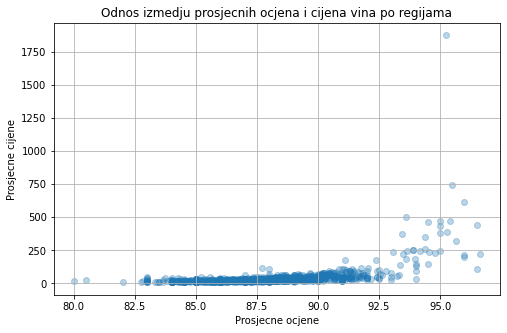

In [12]:
plt.figure(figsize=(8, 5))
plt.scatter(grupa["poeni"], grupa["cijena"], alpha =0.3)
plt.title("Odnos izmedju prosjecnih ocjena i cijena vina po regijama")
plt.xlabel("Prosjecne ocjene")
plt.ylabel("Prosjecne cijene")
plt.grid(True)
plt.show()

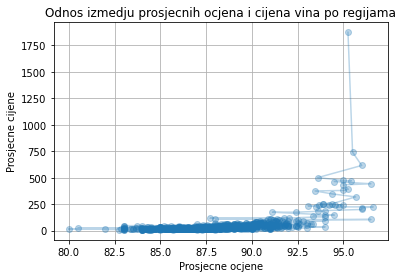

In [13]:
plt.plot(grupa["poeni"], grupa["cijena"], marker="o", linestyle ="-", alpha = 0.3)
plt.title("Odnos izmedju prosjecnih ocjena i cijena vina po regijama")
plt.xlabel("Prosjecne ocjene")
plt.ylabel("Prosjecne cijene")
plt.grid(True)
plt.show()

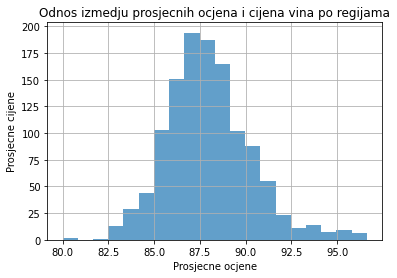

In [14]:
plt.hist(grupa["poeni"], bins=20, alpha=0.7)
plt.title("Odnos izmedju prosjecnih ocjena i cijena vina po regijama")
plt.xlabel("Prosjecne ocjene")
plt.ylabel("Prosjecne cijene")
plt.grid(True)
plt.show()


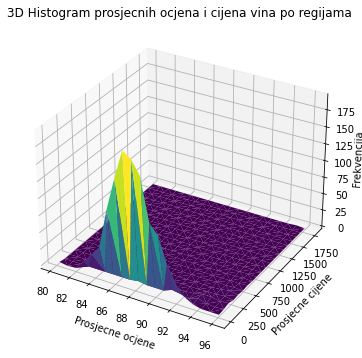

In [15]:
from mpl_toolkits.mplot3d import Axes3D

figura = plt.figure(figsize=(8, 6))
osa = figura.add_subplot(111, projection = "3d")

hist, xedges, yedges = np.histogram2d(grupa["poeni"], grupa["cijena"], bins=20)

xpos, ypos = np.meshgrid(xedges[:-1] + 0.25, yedges[:-1] + 0.25, indexing = "ij")
xpos = xpos.ravel()
ypos = ypos.ravel()
zpos = np.zeros_like(xpos)

dx = dy = 0.5*np.ones_like(zpos)
dz = hist.ravel()

osa.plot_trisurf(xpos, ypos, dz, cmap=plt.cm.viridis, linewidth=0.2)

osa.set_xlabel("Prosjecne ocjene")
osa.set_ylabel("Prosjecne cijene")
osa.set_zlabel("Frekvencija", labelpad = 0.001)
osa.set_title("3D Histogram prosjecnih ocjena i cijena vina po regijama")

plt.show()

In [16]:
plt.figure(figsize=(10, 6))
boxprops = dict(linewidth=1.5)
medianprops = dict(linewidth=1.5)
df.boxplot(column="cijena", by="vrsta", figsize=(10, 6), boxprops=boxprops, medianprops=medianprops
    
plt.title("Razlika u cijenama između različitih vrsta vina")
plt.ylabel("Cijena")
plt.xlabel("Vrsta")
plt.show()

SyntaxError: '(' was never closed (225055993.py, line 4)

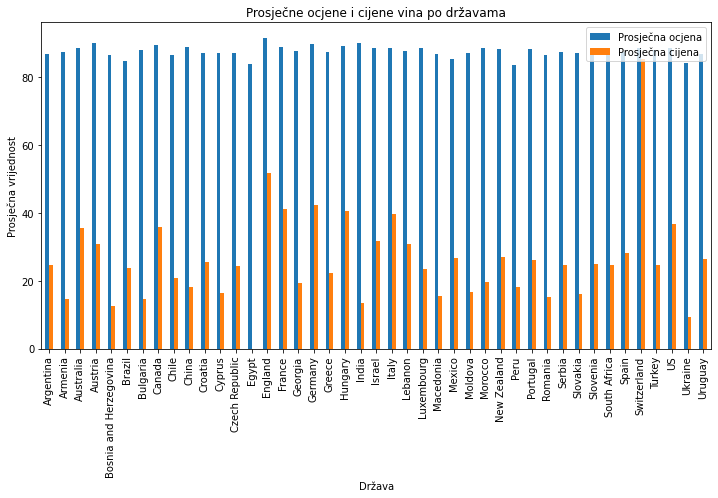

In [18]:
prosjeci_drzave = df.groupby('drzava').agg({'poeni':'mean', 'cijena':'mean'})
prosjeci_drzave.plot(kind='bar', figsize=(12, 6))
plt.title('Prosječne ocjene i cijene vina po državama')
plt.xlabel('Država')
plt.ylabel('Prosječna vrijednost')
plt.legend(['Prosječna ocjena', 'Prosječna cijena'])
plt.xticks(rotation=90)
plt.show()


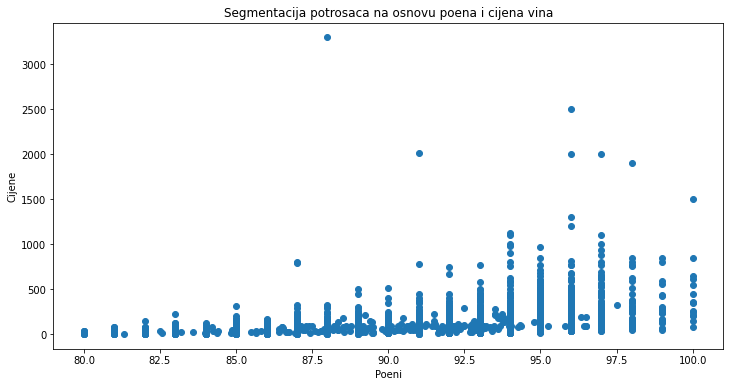

In [19]:
df["Poeni-Cijena"] = df["poeni"] * df["cijena"]

grupisani_podaci = df.groupby("Poeni-Cijena").agg({"poeni": "mean", "cijena": "mean"}).reset_index()

plt.figure(figsize=(12, 6))
plt.scatter(grupisani_podaci["poeni"], grupisani_podaci["cijena"])
plt.title("Segmentacija potrosaca na osnovu poena i cijena vina")
plt.xlabel("Poeni")
plt.ylabel("Cijene")
plt.show()

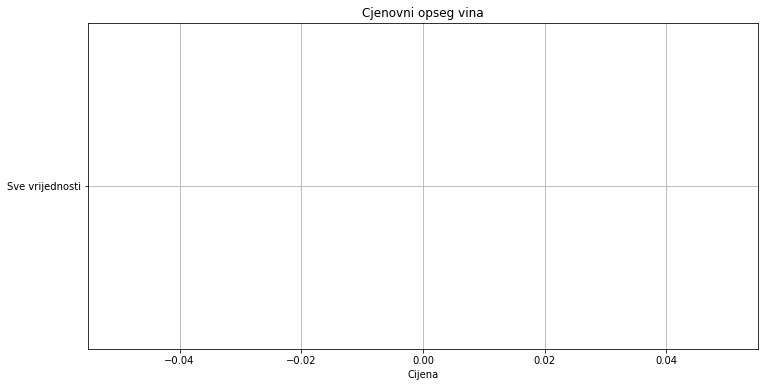

In [20]:
kvantili = np.percentile(df["cijena"], [0, 25, 50, 75, 100])

plt.figure(figsize=(12, 6))
plt.boxplot(df["cijena"], vert=False)
plt.title("Cjenovni opseg vina")
plt.xlabel("Cijena")
plt.yticks([1], ["Sve vrijednosti"])
plt.grid(True)
plt.show()

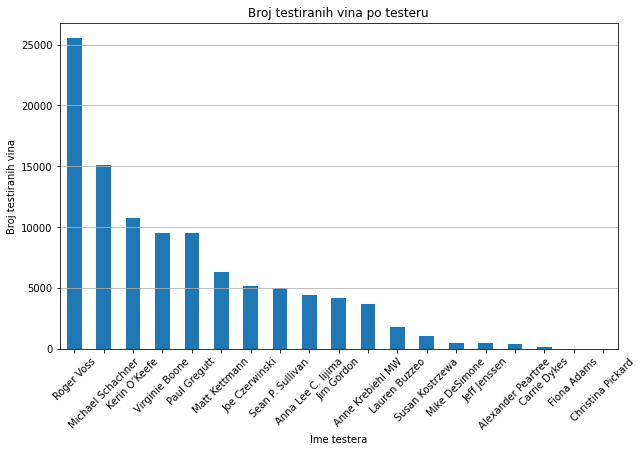

In [21]:
df = pd.read_csv("vina.csv")

broj_testiranih = df["ime_testera"].value_counts()

plt.figure(figsize=(10, 6))
broj_testiranih.plot(kind="bar")
plt.title("Broj testiranih vina po testeru")
plt.xlabel("Ime testera")
plt.ylabel("Broj testiranih vina")
plt.xticks(rotation=45)
plt.grid(axis="y")
plt.show()

In [22]:
prosjecne_ocjene = df.groupby("vinarija")["poeni"].mean().sort_values(ascending=False)

najbolja_vinarija = prosjecne_ocjene.idxmax()
najbolja_ocjena = prosjecne_ocjene.max()


print(f"Vinarija sa najboljom prosjecnom ocjenom: {najbolja_vinarija} (Ocjena: {najbolja_ocjena})")

Vinarija sa najboljom prosjecnom ocjenom: Araujo (Ocjena: 98.0)


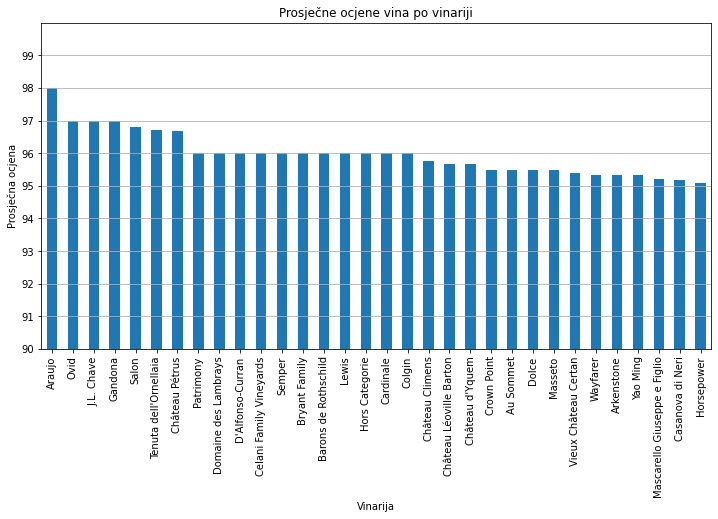

In [24]:
iznad_95 = prosjecne_ocjene[prosjecne_ocjene > 95]
plt.figure(figsize=(12, 6))
iznad_95.plot(kind='bar')
plt.title('Prosječne ocjene vina po vinariji')
plt.xlabel('Vinarija')
plt.ylabel('Prosječna ocjena')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.ylim(90, 100)
plt.yticks(range(90, 100))
plt.show()